In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
import datetime
from datetime import timedelta  
import timeboard as tb # turnos 

# para tratar de poner espanol
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data
from matplotlib_venn import venn3
from matplotlib_venn import venn2, venn2_circles
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


#otro graficador
import seaborn as sns

#stats

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/home/egidio/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# importar funciones locales

In [2]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())


['/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc']

# importo BD 

In [3]:
os.getcwd()

'/home/egidio/Dropbox/Trabajos científicos/Conocimiento 131'

In [4]:
db1 = pd.read_excel('./tabulación.xlsx', sheet_name='Hoja2')
db2 = pd.read_excel('./Tab2.xlsx')

In [5]:
db1.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10.1,p10.2,p10.3,p10.4,p10.5,p10.6,p10.7,ciudad
0,c,b,e,a,a,b,c,d,a,b,b,a,b,a,a,b,a
1,c,a,c,a,b,b,c,d,a,b,b,a,b,a,a,b,a
2,d,b,a,a,b,b,c,d,a,b,b,a,b,a,a,b,a
3,c,b,e,a,b,b,c,d,c,b,a,a,b,a,a,b,a
4,c,b,e,a,b,b,c,d,a,b,b,a,b,a,a,b,a


In [6]:
db1.loc[db1.p2 == 'a', 'p2'] = 'Mujer'
db1.loc[db1.p2 == 'b', 'p2'] = 'Hombre'
db1.loc[db1.p2 == 'c', 'p2'] = 'Otros'
db1.loc[db1.p2 == 'd', 'p2'] = np.nan

In [7]:
db1.p2.value_counts(normalize = True)*100
db1.p2.value_counts(normalize = True)

Mujer     54.020101
Hombre    45.728643
Otros      0.251256
Name: p2, dtype: float64

Mujer     0.540201
Hombre    0.457286
Otros     0.002513
Name: p2, dtype: float64

In [8]:
db1.loc[db1.p3 == 'a', 'p3'] = 'Sin estudios'
db1.loc[db1.p3 == 'b', 'p3'] = 'Ensenanza Básica'
db1.loc[db1.p3 == 'c', 'p3'] = 'Ensenanza Media'
db1.loc[db1.p3 == 'd', 'p3'] =  'Nivel Técnico'
db1.loc[db1.p3 == 'e', 'p3'] =  'Nivel Universitario'

In [9]:
db1.p3.value_counts()
db1.p3.value_counts(normalize=True)*100

Ensenanza Media        210
Nivel Universitario     67
Nivel Técnico           59
Ensenanza Básica        56
Sin estudios             8
Name: p3, dtype: int64

Ensenanza Media        52.50
Nivel Universitario    16.75
Nivel Técnico          14.75
Ensenanza Básica       14.00
Sin estudios            2.00
Name: p3, dtype: float64

In [10]:
db1.loc[db1.p4 == 'a', 'p4'] = 'Chilena'
db1.loc[db1.p4 == 'b', 'p4'] = 'Extranjero'

In [11]:
db1.loc[db1.p5 == 'a', 'p5'] = '911'
db1.loc[db1.p5 == 'b', 'p5'] = '131'
db1.loc[db1.p5 == 'c', 'p5'] = '132'
db1.loc[db1.p5 == 'd', 'p5'] = '133'

In [12]:
db1 = db1.rename(columns= {'p1': 'Edad',
                     'p2': 'Sexo',
                     'p3': 'Nv_educacional',
                     'p4': 'Nacionalidad',
                     'p5': 'c1',
                     'p6': 'c2',
                     'p7': 'c3', 
                     'p8': 'c4', 
                     'p9': 'Mariconadas',
                     'p10':'p10',
                     'ciudad': 'Ciudad'}
          )

In [13]:
db1.head()

,Edad,Sexo,Nv_educacional,Nacionalidad,c1,c2,c3,c4,Mariconadas,p10.1,p10.2,p10.3,p10.4,p10.5,p10.6,p10.7,Ciudad
0,c,Hombre,Nivel Universitario,Chilena,911,b,c,d,a,b,b,a,b,a,a,b,a
1,c,Mujer,Ensenanza Media,Chilena,131,b,c,d,a,b,b,a,b,a,a,b,a
2,d,Hombre,Sin estudios,Chilena,131,b,c,d,a,b,b,a,b,a,a,b,a
3,c,Hombre,Nivel Universitario,Chilena,131,b,c,d,c,b,a,a,b,a,a,b,a
4,c,Hombre,Nivel Universitario,Chilena,131,b,c,d,a,b,b,a,b,a,a,b,a


In [14]:
db1['Conocimiento131'] = db1.c1
db1['Conocimiento'] = np.nan

In [15]:
pd.crosstab(db1.c1, db1.Nv_educacional, normalize='columns')*100

Nv_educacional,Ensenanza Básica,Ensenanza Media,Nivel Técnico,Nivel Universitario,Sin estudios
c1,,,,,
131,37.500000,52.380952,57.627119,59.701493,50.0
132,12.500000,24.285714,20.338983,16.417910,12.5
133,19.642857,7.619048,6.779661,2.985075,37.5
911,30.357143,15.714286,15.254237,20.895522,0.0


In [16]:
db1.head()

,Edad,Sexo,Nv_educacional,Nacionalidad,c1,c2,c3,c4,Mariconadas,p10.1,p10.2,p10.3,p10.4,p10.5,p10.6,p10.7,Ciudad,Conocimiento131,Conocimiento
0,c,Hombre,Nivel Universitario,Chilena,911,b,c,d,a,b,b,a,b,a,a,b,a,911,NaN
1,c,Mujer,Ensenanza Media,Chilena,131,b,c,d,a,b,b,a,b,a,a,b,a,131,NaN
2,d,Hombre,Sin estudios,Chilena,131,b,c,d,a,b,b,a,b,a,a,b,a,131,NaN
3,c,Hombre,Nivel Universitario,Chilena,131,b,c,d,c,b,a,a,b,a,a,b,a,131,NaN
4,c,Hombre,Nivel Universitario,Chilena,131,b,c,d,a,b,b,a,b,a,a,b,a,131,NaN


# 2da Versión

In [22]:
db2 .head()

,Ciudad,Edad,Sexo,Niv. Educación,Nacionalidad,Número SAMU,Conocimiento,Pertinencia,Difusión
1,NaN,22,mujer,técnico,chilena,131,2,7,a
2,Quillota,24,mujer,universitario,chilena,132,3,5,a
3,Quillota,24,mujer,universitario,chilena,131,2,7,a
4,Quillota,40,mujer,media,extranjero,911,1,6,a
5,Quillota,45,hombre,media,chilena,131,3,7,b


## Características demográficas

,n,%
Sexo,,
hombre,52,52.0
mujer,47,47.0
otro,1,1.0
Total,100,100.0


count    100.000000
mean      30.710000
std       17.609281
min       11.000000
25%       18.000000
50%       23.500000
75%       40.250000
max       78.000000
Name: Edad, dtype: float64

,n,%
Niv. Educación,,
media,51,51.0
técnico,18,18.0
universitario,16,16.0
básica,14,14.0
sin estudios,1,1.0
Total,100,100.0


,n,%
Nacionalidad,,
chilena,97,97.0
extranjero,3,3.0
Total,100,100.0


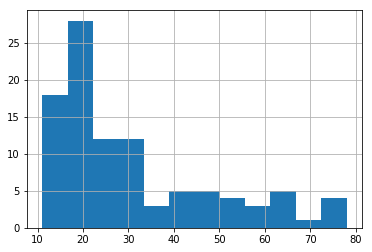

In [48]:
tab_frec(db2.Sexo)
db2.Edad.describe()
db2.Edad.hist(bins=12)
tab_frec(db2['Niv. Educación'])
tab_frec(db2.Nacionalidad)


## Cococimiento del 131

In [55]:
db2['Número SAMU'] = pd.Categorical(db2['Número SAMU'])
tab_frec(db2['Número SAMU'])

,n,%
Número SAMU,,
131,55,55.0
911,18,18.0
132,18,18.0
133,9,9.0
Total,100,100.0


In [28]:
db2.groupby('Sexo').Conocimiento.describe()
db2.groupby('Sexo').Pertinencia.describe()
db2.groupby('Niv. Educación').Conocimiento.describe()
db2.groupby('Niv. Educación').Pertinencia.describe()
db2.groupby('Nacionalidad').Conocimiento.describe()
db2.groupby('Nacionalidad').Pertinencia.describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
hombre,52.0,2.692308,0.466041,2.0,2.0,3.0,3.0,3.0
mujer,47.0,2.510638,0.687539,1.0,2.0,3.0,3.0,3.0
otro,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0


,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
hombre,52.0,5.923077,1.655012,1.0,6.0,7.0,7.0,7.0
mujer,47.0,6.148936,0.955049,4.0,5.5,6.0,7.0,7.0
otro,1.0,7.000000,NaN,7.0,7.0,7.0,7.0,7.0


,count,mean,std,min,25%,50%,75%,max
Niv. Educación,,,,,,,,
básica,14.0,2.642857,0.633324,1.0,2.25,3.0,3.0,3.0
media,51.0,2.549020,0.642300,1.0,2.00,3.0,3.0,3.0
sin estudios,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
técnico,18.0,2.666667,0.485071,2.0,2.00,3.0,3.0,3.0
universitario,16.0,2.687500,0.478714,2.0,2.00,3.0,3.0,3.0


,count,mean,std,min,25%,50%,75%,max
Niv. Educación,,,,,,,,
básica,14.0,5.571429,1.222500,3.0,5.0,5.5,6.75,7.0
media,51.0,6.098039,1.445751,1.0,6.0,7.0,7.00,7.0
sin estudios,1.0,5.000000,NaN,5.0,5.0,5.0,5.00,5.0
técnico,18.0,5.888889,1.604732,1.0,6.0,6.0,7.00,7.0
universitario,16.0,6.500000,0.730297,5.0,6.0,7.0,7.00,7.0


,count,mean,std,min,25%,50%,75%,max
Nacionalidad,,,,,,,,
chilena,97.0,2.618557,0.567217,1.0,2.0,3.0,3.0,3.0
extranjero,3.0,2.333333,1.154701,1.0,2.0,3.0,3.0,3.0


,count,mean,std,min,25%,50%,75%,max
Nacionalidad,,,,,,,,
chilena,97.0,6.030928,1.38032,1.0,6.0,7.0,7.0,7.0
extranjero,3.0,6.333333,0.57735,6.0,6.0,6.0,6.5,7.0


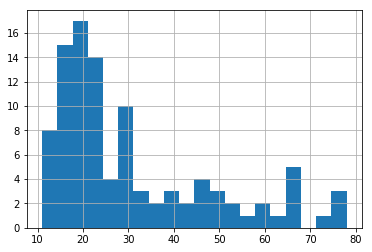

In [26]:
db2.Edad.hist(bins=20)

In [35]:
db2.groupby('Nacionalidad').count()

,Ciudad,Edad,Sexo,Niv. Educación,Número SAMU,Conocimiento,Pertinencia,Difusión
Nacionalidad,,,,,,,,
chilena,96,97,97,97,97,97,97,97
extranjero,3,3,3,3,3,3,3,3
